<a href="https://colab.research.google.com/github/dicrojasch/multivariate_statistics/blob/main/An%C3%A1lisis_de_Conglomerados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("factoextra")

# Metodos de Particion

## K-Means

In [6]:
%%R
data("USArrests") # Loading the data set
df <- scale(USArrests) # Scaling the data
head(df, n = 3)# View the first 3 rows of the data

            Murder   Assault   UrbanPop         Rape
Alabama 1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska  0.50786248 1.1068225 -1.2117642  2.484202941
Arizona 0.07163341 1.4788032  0.9989801  1.042878388


El dataset USArrests es un conjunto de datos incluido en el entorno de R que contiene información sobre las tasas de arrestos en los Estados Unidos en 1973.

Este dataset proporciona estadísticas de criminalidad por estado para tres tipos de crímenes violentos y el porcentaje de urbanización en cada estado.

Estructura del dataset: El conjunto de datos tiene 50 observaciones, una por cada estado de EE.UU., y 4 variables:

- Murder: Tasa de homicidios (asesinatos) por cada 100,000 habitantes en cada estado.
- Assault: Tasa de asaltos por cada 100,000 habitantes en cada estado.
- UrbanPop: Porcentaje de la población que vive en áreas urbanas en cada estado.
- Rape: Tasa de violaciones por cada 100,000 habitantes en cada estado.

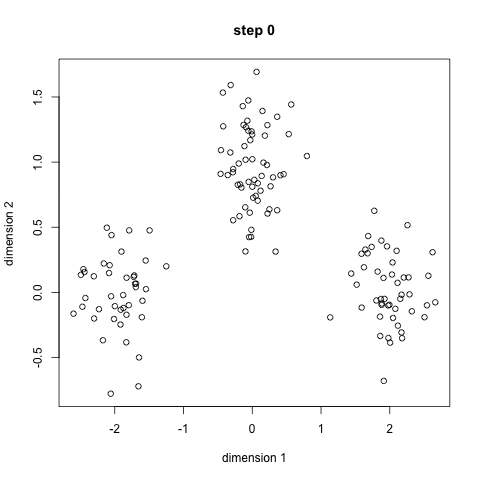

In [10]:
%%R
set.seed(123)
km.res <- kmeans(df, 4, nstart = 25)
km.res

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

In [ ]:
%%R
library(factoextra)

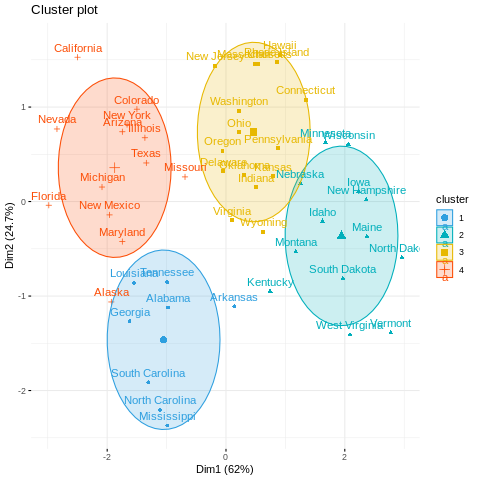

In [14]:
%%R
fviz_cluster(km.res, data = df,
palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"), ellipse.type = "euclid", # Concentration ellipse star.plot = TRUE, # Add segments from centroids to items repel = TRUE, # Avoid label overplotting (slow)
ggtheme = theme_minimal()
)

1. Los resultados finales obtenidos son sensibles a la selección aleatoria inicial de los centroides o al reorganizar los datos, es muy posible que obtenga una solución diferente cada vez.

2. Es sensible a los valores atípicos.


  - Para solucionar (1) se puede calcular el algoritmo de k-medias varias veces con diferentes centros de conglomerado iniciales. La ejecución con la **suma total de cuadrados** dentro del conglomerado más baja se selecciona como la solución de agrupamiento final.

  - Para evitar distorsiones en (2) causadas por valores atípicos excesivos, es posible utilizar el algoritmo PAM, que es menos sensible a los valores atípicos.

## K-Medoids
### PAM

In [ ]:
%%R
install.packages(c("cluster"))

In [18]:
%%R
library(cluster)
library(factoextra)

In [21]:
%%R
pam.res <- pam(df, 2, metric = "manhattan")
pam.res

Medoids:
           ID     Murder    Assault   UrbanPop       Rape
New Mexico 31  0.8292944  1.3708088  0.3081225  1.1603196
Nebraska   27 -0.8008247 -0.8250772 -0.2445636 -0.5052109
Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana       Nebraska         

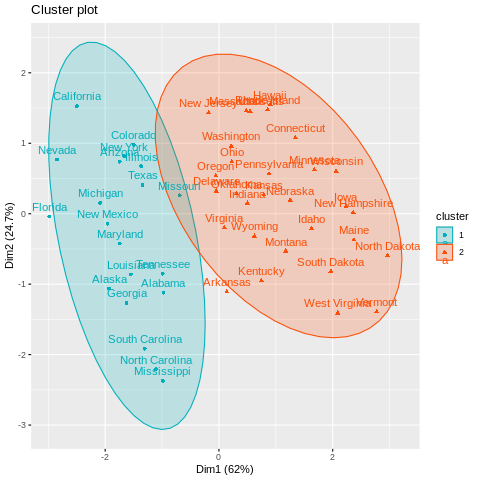

In [23]:
%%R
fviz_cluster(pam.res,
palette = c("#00AFBB", "#FC4E07"), # color palette
ellipse.type = "t", # Concentration ellipse repel = TRUE, # Avoid label overplotting (slow) ggtheme = theme_classic()
)

## El método de partición CLARA - Clustering Large Applications

In [24]:
%%R
set.seed(1234)
# Generate 500 objects, divided into 2 clusters.
df <- rbind(cbind(rnorm(200,0,8), rnorm(200,0,8)),
            cbind(rnorm(300,50,8), rnorm(300,50,8)))
# Specify column and row names
colnames(df) <- c("x", "y")
rownames(df) <- paste0("S", 1:nrow(df))
# Previewing the data
head(df, nrow = 6)

            x        y
S1  -9.656526 3.881815
S2   2.219434 5.574150
S3   8.675529 1.484111
S4 -18.765582 5.605868
S5   3.432998 2.493448
S6   4.048447 6.083699


In [26]:
%%R
clara.res <- clara(df, 2, samples = 50, pamLike = TRUE)
clara.res

Call:	 clara(x = df, k = 2, samples = 50, pamLike = TRUE) 
Medoids:
             x         y
S121 -1.531137  1.145057
S455 48.357304 50.233499
Objective function:	 9.87862
Clustering vector: 	 Named int [1:500] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:500] "S1" "S2" "S3" "S4" "S5" "S6" "S7" ...
Cluster sizes:	    	 200 300 
Best sample:
 [1] S37  S49  S54  S63  S68  S71  S76  S80  S82  S101 S103 S108 S109 S118 S121
[16] S128 S132 S138 S144 S162 S203 S210 S216 S231 S234 S249 S260 S261 S286 S299
[31] S304 S305 S312 S315 S322 S350 S403 S450 S454 S455 S456 S465 S488 S497

Available components:
 [1] "sample"     "medoids"    "i.med"      "clustering" "objective" 
 [6] "clusinfo"   "diss"       "call"       "silinfo"    "data"      


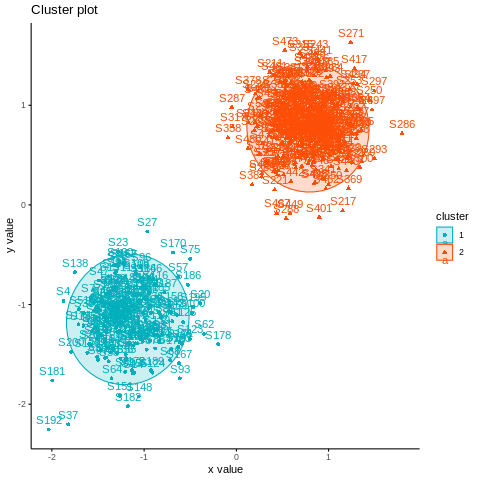

In [28]:
%%R
fviz_cluster(clara.res,
palette = c("#00AFBB", "#FC4E07"), # color palette
ellipse.type = "t", # Concentration ellipse geom = "point", pointsize = 1,
ggtheme = theme_classic()
)

# Métodos Jerárquicos

In [ ]:
%%R
## Los ejemplos son tomados del siguiente texto mencionado en la bibliografía:
## Kassambara, A. (2017). Practical Guide to Cluster Analysis in R: Unsupervised Machine Learning. STHDA.

# Load the data
data("USArrests")
# Standardize the data
df <- scale(USArrests)
# Show the first 6 rows
head(df, nrow = 6)

               Murder   Assault   UrbanPop         Rape
Alabama    1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska     0.50786248 1.1068225 -1.2117642  2.484202941
Arizona    0.07163341 1.4788032  0.9989801  1.042878388
Arkansas   0.23234938 0.2308680 -1.0735927 -0.184916602
California 0.27826823 1.2628144  1.7589234  2.067820292
Colorado   0.02571456 0.3988593  0.8608085  1.864967207


In [ ]:
%%R
# Compute the dissimilarity matrix
# df = the standardized data
res.dist <- dist(df, method = "euclidean")

# the distance measure to be used.
# This must be one of "euclidean", "maximum", "manhattan", "canberra", "binary" or "minkowski". Any unambiguous substring can be given.

as.matrix(res.dist)[1:6, 1:6]

            Alabama   Alaska  Arizona Arkansas California Colorado
Alabama    0.000000 2.703754 2.293520 1.289810   3.263110 2.651067
Alaska     2.703754 0.000000 2.700643 2.826039   3.012541 2.326519
Arizona    2.293520 2.700643 0.000000 2.717758   1.310484 1.365031
Arkansas   1.289810 2.826039 2.717758 0.000000   3.763641 2.831051
California 3.263110 3.012541 1.310484 3.763641   0.000000 1.287619
Colorado   2.651067 2.326519 1.365031 2.831051   1.287619 0.000000


In [ ]:
%%R
res.hc <- hclust(d = res.dist, method = "ward.D2")

# method: The agglomeration (linkage) method to be used for computing distance
# between clusters. Allowed values is one of “ward.D”, “ward.D2”, “single”,
# “complete”, “average”, “mcquitty”, “median” or “centroid”.

res.hc


Call:
hclust(d = res.dist, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 50 




https://community.rstudio.com/c/tidyverse




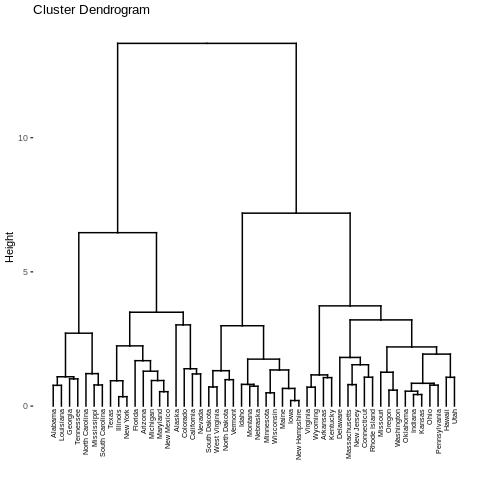

In [ ]:
%%R
# cex: label size
library(factoextra)
fviz_dend(res.hc, cex = 0.5)

La altura de la fusión, indicada en el eje vertical, representa la similitud/distancia entre dos objetos o clusters. Cuanto mayor sea la altura de la fusión, menos similares son los objetos. Esta altura se conoce como la distancia cofenética entre los dos objetos.

In [ ]:
%%R

# Cut tree into 4 groups
grp <- cutree(res.hc, k = 4)
head(grp, n = 4)

 Alabama   Alaska  Arizona Arkansas 
       1        2        2        3 


In [ ]:
%%R
# Number of members in each cluster
table(grp)

grp
 1  2  3  4 
 7 12 19 12 


In [ ]:
%%R

# Get the names for the members of cluster 1
rownames(df)[grp == 1]

[1] "Alabama"        "Georgia"        "Louisiana"      "Mississippi"   
[5] "North Carolina" "South Carolina" "Tennessee"     


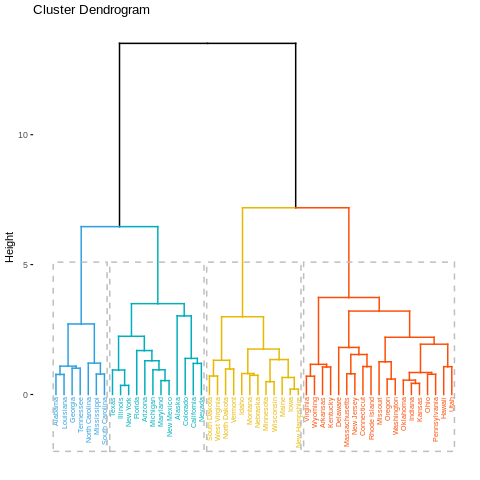

In [ ]:
%%R
# Cut in 4 groups and color by groups
fviz_dend(res.hc, k = 4, # Cut in four groups

cex = 0.5, # label size
k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
color_labels_by_k = TRUE, # color labels by groups
rect= TRUE # Add rectangle around groups
)

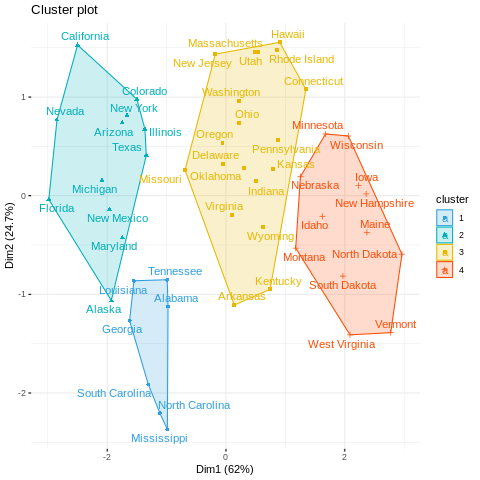

In [ ]:
%%R
fviz_cluster(list(data = df, cluster = grp),

palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
ellipse.type = "convex", # Concentration ellipse
repel = TRUE, # Avoid label overplotting (slow)
show.clust.cent = FALSE, ggtheme = theme_minimal())

In [ ]:
%%R
library("cluster")
# Agglomerative Nesting (Hierarchical Clustering)
res.agnes <- agnes(x = USArrests, # data matrix
stand = TRUE, # Standardize the data
metric = "euclidean", # metric for distance matrix
method = "ward" # Linkage method
)

# DIvisive ANAlysis Clustering
res.diana <- diana(x = USArrests, # data matrix
stand = TRUE, # standardize the data
metric = "euclidean" # metric for distance matrix
)

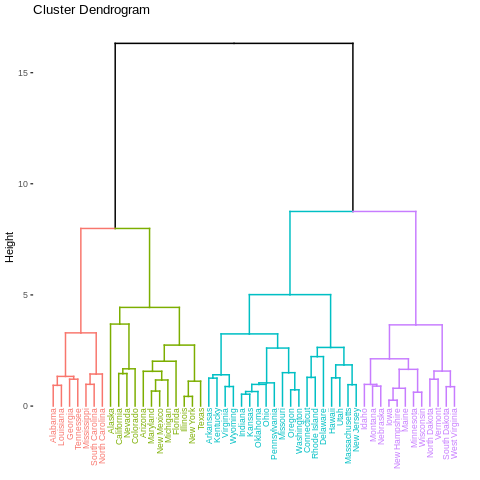

In [ ]:
%%R
fviz_dend(res.agnes, cex = 0.6, k = 4)

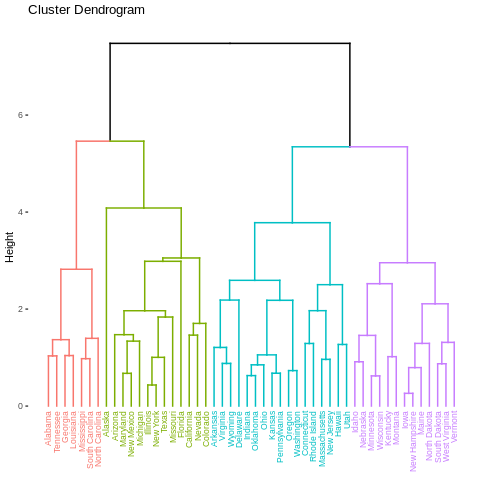

In [ ]:
%%R
fviz_dend(res.diana, cex = 0.6, k = 4)

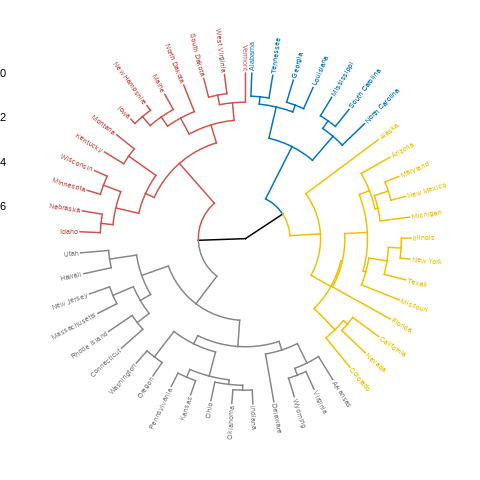

In [ ]:

%%R
fviz_dend(res.diana, cex = 0.5, k = 4,

k_colors = "jco", type = "circular")

# Validación

## Evaluación de la tendencia a la agrupación.

### Inspección visual de los datos

In [ ]:
%%R
install.packages("clustertend")

#### Iris Dataset

El conjunto de datos Iris contiene 150 observaciones de flores de tres especies diferentes de Iris:

- Iris setosa
- Iris versicolor
- Iris virginica

Cada observación corresponde a una flor y tiene 4 características medidas en centímetros:

- Sepal.Length: Longitud del sépalo (cm)
- Sepal.Width: Anchura del sépalo (cm)
- Petal.Length: Longitud del pétalo (cm)
- Petal.Width: Anchura del pétalo (cm)
- Species: Especie de la flor (Setosa, Versicolor, Virginica)

Estructura:

150 filas (una por cada flor).
5 columnas (4 características numéricas y 1 categórica de especie).

In [ ]:
%%R
library("clustertend")
library(factoextra)
# Iris data set
df <- iris[, -5]
# Random data generated from the iris data set
random_df <- apply(df, 2, function(x){ runif(length(x), min(x), (max(x))) } )
random_df <- as.data.frame(random_df)
# Standardize the data sets
df <- iris.scaled <- scale(df)
random_df <- scale(random_df)

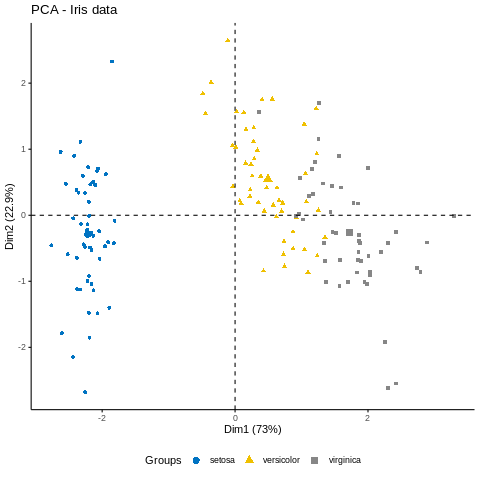

In [14]:
%%R
# Plot faithful data set
fviz_pca_ind(prcomp(df), title = "PCA - Iris data",
habillage = iris$Species, palette = "jco", geom = "point", ggtheme = theme_classic(), legend = "bottom")

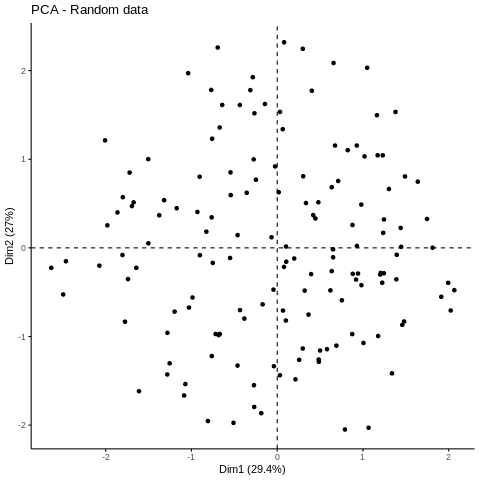

In [15]:
%%R
# Plot the random df
fviz_pca_ind(prcomp(random_df), title = "PCA - Random data", geom = "point", ggtheme = theme_classic())

### ¿Por qué evaluar la tendencia de agrupamiento?


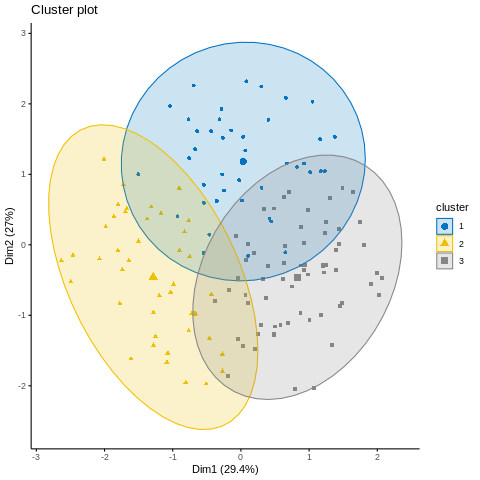

In [16]:
%%R
# K-means on the random dataset
km.res2 <- kmeans(random_df, 3)
fviz_cluster(list(data = random_df, cluster = km.res2$cluster),
ellipse.type = "norm", geom = "point", stand = FALSE, palette = "jco", ggtheme = theme_classic())

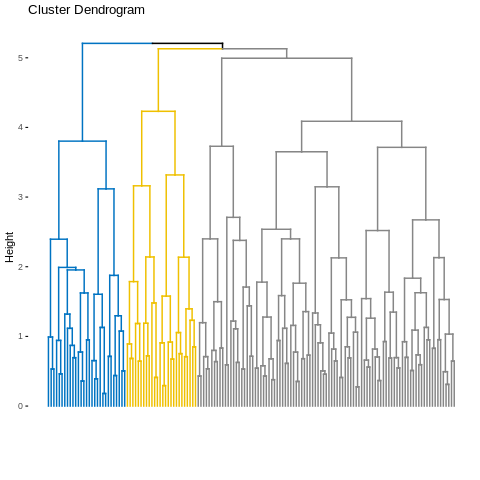

In [17]:
%%R
# Hierarchical clustering on the random dataset
fviz_dend(hclust(dist(random_df)), k = 3, k_colors = "jco", as.ggplot = TRUE, show_labels = FALSE)

El algoritmo **K-means** y el **agrupamiento jerárquico** pueden crear grupos en un conjunto de datos, incluso si estos están distribuidos de forma aleatoria y no contienen grupos significativos. Por eso, es importante usar **métodos de evaluación de la tendencia** de agrupamiento para determinar si realmente existen grupos significativos en los datos antes de realizar un análisis de agrupamiento. Esto ayuda a validar si el análisis es adecuado para los datos en cuestión.

### Métodos para evaluar la tendencia a la agrupación

#### Estadístico de Hopkins

Cálculo del Estadístico de Hopkins para el Dataset Iris

In [18]:
%%R
library(clustertend)
# Compute Hopkins statistic for iris dataset
set.seed(123)
hopkins(df, n = nrow(df)-1)

$H
[1] 0.1842219



Cálculo del Estadístico de Hopkins para el Dataset aleatorio


In [19]:
%%R
# Compute Hopkins statistic for a random dataset
set.seed(123)
hopkins(random_df, n = nrow(random_df)-1)

$H
[1] 0.4884128



#### Métodos Visuales

##### Evaluación visual de la tendencia de agrupamiento - visual assessment of cluster tendency (VAT)

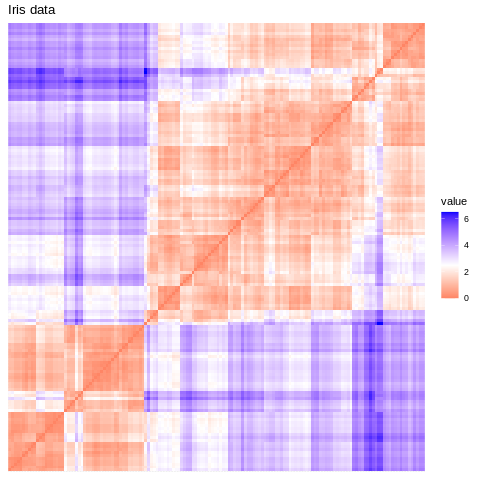

In [20]:
%%R
fviz_dist(dist(df), show_labels = FALSE)+ labs(title = "Iris data")

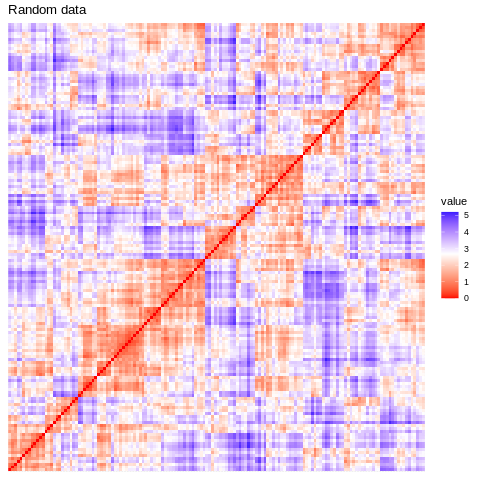

In [21]:
%%R
fviz_dist(dist(random_df), show_labels = FALSE)+ labs(title = "Random data")

Rojo: alta similitud | Azul: baja similitud

El nivel de color es proporcional al valor de la disimilitud entre las observaciones: rojo puro si $dist(x_i,x_j )=0$ y azul puro si $dist(x_i,x_j )=1$. Los objetos que pertenecen al mismo grupo se muestran en orden consecutivo.

El VAT detecta la tendencia de agrupamiento en forma visual contando la cantidad de bloques oscuros con forma cuadrada a lo largo de la diagonal en una imagen VAT.


## Determinar el número óptimo de conglomerados.

### Método de codo.

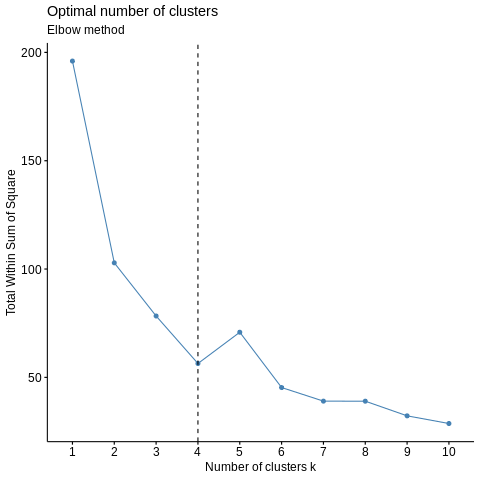

In [27]:
%%R
# Standardize the data
df <- scale(USArrests)

fviz_nbclust(df, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = 2)+
labs(subtitle = "Elbow method")


### Método de silueta promedio.

####	Coeficiente de silueta

El análisis de silueta mide qué tan bien se agrupa una observación en su propio clúster (cohesión) y comparación con los puntos en los otros clústeres (separación), esto se logra estimando la distancia promedio entre los grupos. El gráfico de silueta muestra una medida de qué tan cerca está cada punto en un grupo de los puntos en los grupos vecinos.




Para cada observación $i$, el ancho de silueta $S_i$ se calcula de la siguiente manera:

1. Cohesión: Para cada observación $i$, calcule la disimilitud promedio $a_i$ entre $i$ y todos los demás puntos del grupo al que pertenece $i$.
2. Separación: Para todos los demás grupos $C$, a los que no pertenece $i$, calcule la disimilitud promedio $d(i,C)$ de $i$ con todas las observaciones de $C$. La más pequeña de estas $d(i,C)$ se define como $b_i= min_c (d(i,C))$  . El valor de $b_i$ puede verse como la disimilitud entre $i$ y su grupo “vecino”, es decir, el más  cercano al que no pertenece.
3. Finalmente, el ancho de silueta de la observación $i$ se define mediante la fórmula:
$S_i= \frac{(b_i-a_i )}{máx(b_i  ,a_i )}$


El ancho de la silueta se puede interpretar de la siguiente manera:
- Las observaciones con un $S_i$ grande (casi 1) están muy bien agrupadas.
- Un $S_i$ pequeño (alrededor de 0) significa que la observación se encuentra entre dos grupos.
- Las observaciones con un $S_i$ negativo probablemente estén ubicadas en el grupo incorrecto.


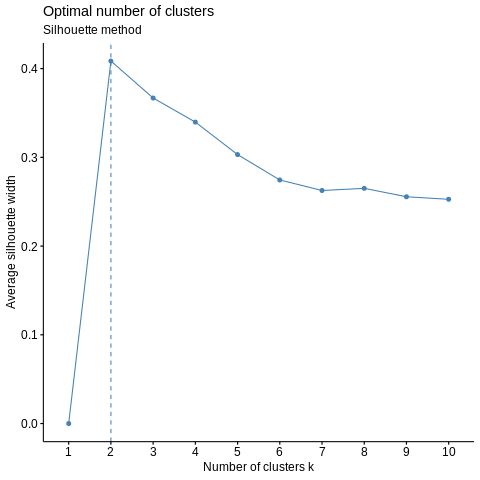

In [28]:
%%R
# Silhouette method
fviz_nbclust(df, kmeans, method = "silhouette")+ labs(subtitle = "Silhouette method")

### Método estadístico de brecha.

#### Variación total dentro del conglomerado

$ W\left( C_k \right) = \sum_{x_i \in C_k}(x_i-u_k )^2  $
         
         
- $x_i$ valor de la i–esimo observacion que pertenece al conglomerado $C_k$
-  $\mu_k$ es el valor de la media de las observaciones asignadas al conglomerado $C_k$


Cada observación $(x_i)$ se asigna a un conglomerado dado, de manera que la suma al cuadrado de la observación a su correspondiente centroide de conglomerado $(\mu_k)$ sea mínima. Se define la variación total dentro del conglomerado de la siguiente manera:

$ tot.withinss= \sum_{k=1}^K W\left( C_k \right) = \sum_{k=1}^K \sum_{x_i \in C_k}(x_i-u_k )^2  $

Clustering k = 1,2,..., K.max (= 10): .. done
Bootstrapping, b = 1,2,..., B (= 500)  [one "." per sample]:
.................................................. 50 
.................................................. 100 
.................................................. 150 
.................................................. 200 
.................................................. 250 
.................................................. 300 
.................................................. 350 
.................................................. 400 
.................................................. 450 
.................................................. 500 


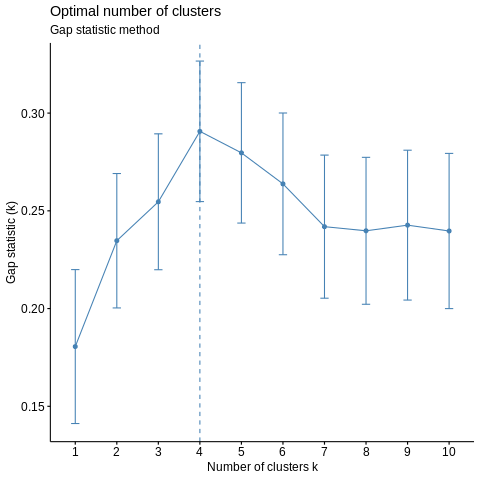

In [29]:
%%R
# Gap statistic
# nboot = 50 to keep the function speedy.
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
set.seed(123)
fviz_nbclust(df, kmeans, nstart = 25, method = "gap_stat", nboot = 500)+
labs(subtitle = "Gap statistic method")

##	Cálculo del valor P para la agrupación jerárquica

In [ ]:
%%R
install.packages("pvclust")

El conjunto de datos lung [del paquete pvclust]. Contiene el perfil de expresión génica de 916 genes en 73 tejidos pulmonares. Las columnas son las muestras y las filas son los genes.

In [34]:
%%R
library(pvclust)
# Load the data
data("lung")
set.seed(123)
ss <- sample(1:73, 30)
df <- lung[, ss]
head(lung[, 1:4])

  method       from      
  text.pvclust dendextend



              fetal_lung 232-97_SCC 232-97_node 68-96_Adeno
IMAGE:196992       -0.40       4.28        3.68       -1.35
IMAGE:587847       -2.22       5.21        4.75       -0.91
IMAGE:1049185      -1.35      -0.84       -2.88        3.35
IMAGE:135221        0.68       0.56       -0.45       -0.20
IMAGE:298560          NA       4.14        3.58       -0.40
IMAGE:119882       -3.23      -2.84       -2.72       -0.83


In [37]:
%%R
dim(lung)

[1] 916  73


In [31]:
%%R
dim(df)


[1] 50  4


In [38]:
%%R
library(pvclust)
set.seed(123)
res.pv <- pvclust(df, method.dist="cor",
                  method.hclust="average", nboot = 10)

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.6)... Done.
Bootstrap (r = 0.7)... Done.
Bootstrap (r = 0.8)... Done.
Bootstrap (r = 0.9)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.1)... Done.
Bootstrap (r = 1.2)... Done.
Bootstrap (r = 1.3)... Done.
Bootstrap (r = 1.4)... Done.


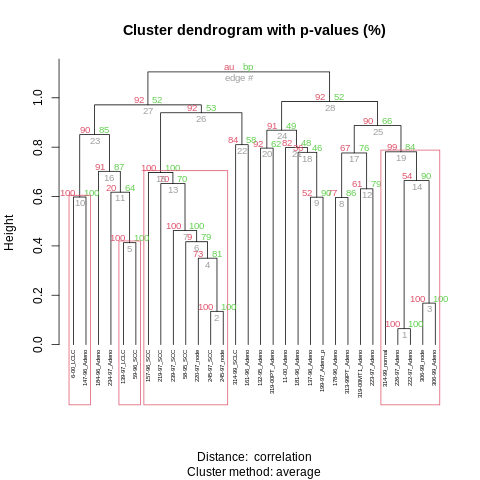

In [39]:
%%R
# Default plot
plot(res.pv, hang = -1, cex = 0.5)
pvrect(res.pv)


Objetos significativos de los clústeres

In [40]:
%%R
clusters <- pvpick(res.pv)
clusters

$clusters
$clusters[[1]]
[1] "139-97_LCLC" "59-96_SCC"  

$clusters[[2]]
[1] "6-00_LCLC"    "147-96_Adeno"

$clusters[[3]]
[1] "157-96_SCC"  "245-97_SCC"  "245-97_node" "58-95_SCC"   "220-97_node"
[6] "219-97_SCC"  "239-97_SCC" 

$clusters[[4]]
[1] "306-99_node"   "314-99_normal" "226-97_Adeno"  "222-97_Adeno" 
[5] "306-99_Adeno" 


$edges
[1]  5 10 15 19



Los valores en el dendrograma incluyen los valores p **AU** (en rojo, a la izquierda), los valores **BP** (en verde, a la derecha) y las etiquetas de los clústeres (en gris, en la parte inferior). Los clústeres con un **AU ≥ 95%** están indicados por rectángulos y se consideran fuertemente respaldados por los datos

# Otras técnicas

### K-means jerárquico

In [ ]:
%%R
df <- scale(USArrests)
res.hk <-hkmeans(df, 4)
# Elements returned by hkmeans()
names(res.hk)

 [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
 [6] "betweenss"    "size"         "iter"         "ifault"       "data"        
[11] "hclust"      


In [ ]:
%%R
# Print the results
res.hk

Hierarchical K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2  0.6950701  1.0394414  0.7226370  1.27693964
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4 -0.9615407 -1.1066010 -0.9301069 -0.96676331

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              4              2              3              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              4              1              4              2 
 Massachusetts       Michigan      Minnesota    Mi

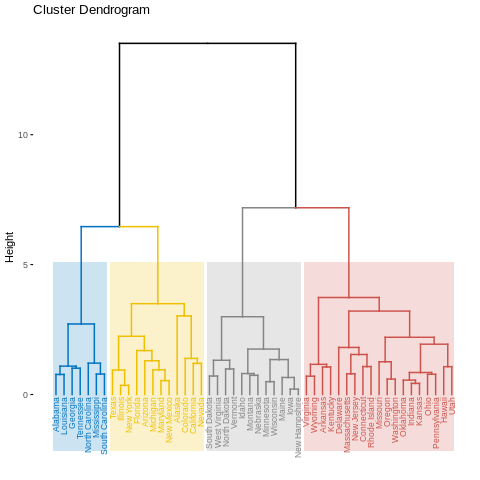

In [ ]:
%%R

# Visualize the tree
fviz_dend(res.hk, cex = 0.6, palette = "jco",

rect = TRUE, rect_border = "jco", rect_fill = TRUE)

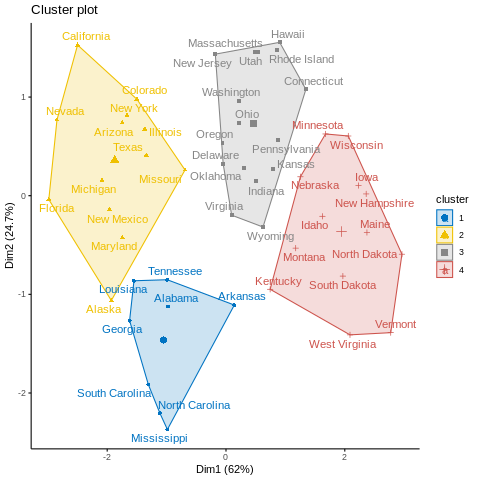

In [ ]:
%%R
# Visualize the hkmeans final clusters
fviz_cluster(res.hk, palette = "jco", repel = TRUE,

ggtheme = theme_classic())

### Fuzzy clustering

In [ ]:
%%R
library(cluster)
df <- scale(USArrests) # Standardize the data
res.fanny <- fanny(df, 3) # Compute fuzzy clustering with k = 3

In [ ]:
%%R
head(res.fanny$membership, 3) # Membership coefficients

             [,1]      [,2]      [,3]
Alabama 0.4676004 0.3144516 0.2179480
Alaska  0.4278809 0.3178707 0.2542484
Arizona 0.5092197 0.2945668 0.1962135


In [ ]:
%%R
res.fanny$coeff # Dunn's partition coefficient

dunn_coeff normalized 
0.37371071 0.06056606 


In [ ]:
%%R
head(res.fanny$clustering) # Observation groups

   Alabama     Alaska    Arizona   Arkansas California   Colorado 
         1          1          1          2          1          1 


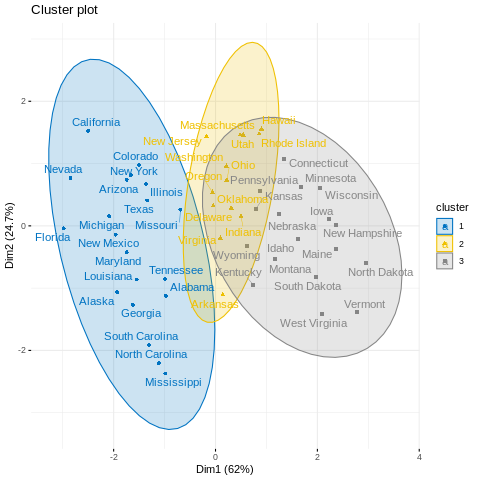

In [ ]:
%%R
fviz_cluster(res.fanny, ellipse.type = "norm", repel = TRUE,
palette = "jco", ggtheme = theme_minimal(),
legend = "right")

  cluster size ave.sil.width
1       1   20          0.24
2       2   13          0.27
3       3   17          0.27


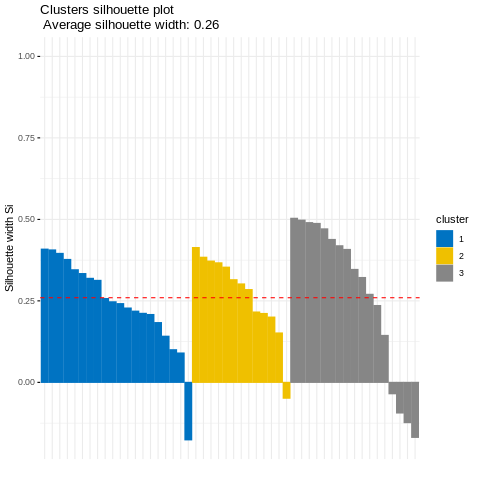

In [ ]:
%%R
fviz_silhouette(res.fanny, palette = "jco",
ggtheme = theme_minimal())

### Basado en modelos

In [ ]:
%%R
install.packages("mclust")

In [ ]:
%%R
library("mclust")
data("diabetes")
head(diabetes, 3)

   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



   class glucose insulin sspg
1 Normal      80     356  124
2 Normal      97     289  117
3 Normal     105     319  143


In [ ]:
%%R
library(mclust)
df <- scale(diabetes[, -1]) # Standardize the data
mc <- Mclust(df) # Model-based-clustering
summary(mc)

fitting ...
  |======================================================================| 100%
---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 3
components: 

 log-likelihood   n df       BIC       ICL
      -169.0908 145 29 -482.5069 -501.4662

Clustering table:
 1  2  3 
81 36 28 


In [ ]:
%%R
mc$modelName # Optimal selected model ==> "VVV"
mc$G # Optimal number of cluster => 3
head(mc$z, 30) # Probality to belong to a given cluster
head(mc$classification, 30) # Cluster assignement of each observation

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
27 28 29 30 
 1  1  1  1 


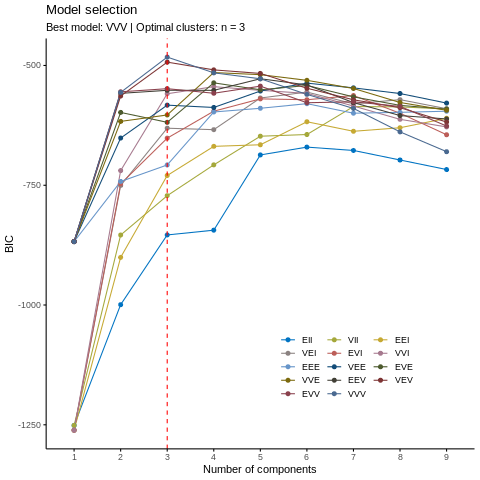

In [ ]:
%%R
# BIC values used for choosing the number of clusters
fviz_mclust(mc, "BIC", palette = "jco")

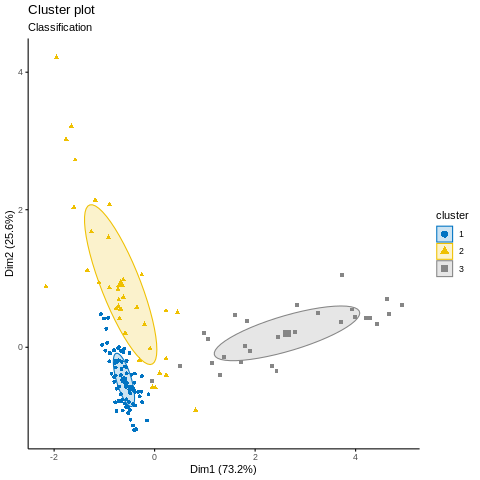

In [ ]:
%%R
# Classification: plot showing the clustering
fviz_mclust(mc, "classification", geom = "point",
pointsize = 1.5, palette = "jco")


### DBSCAN

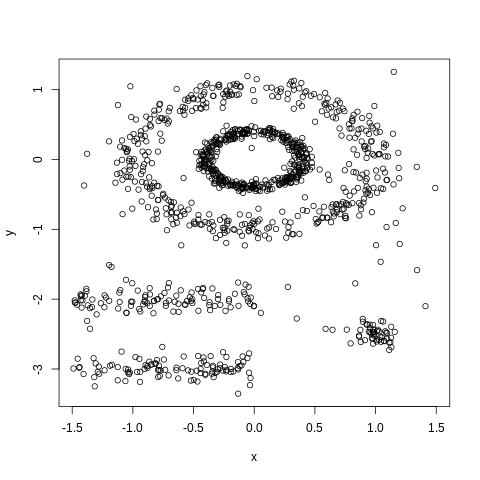

In [ ]:
%%R
data("multishapes")
df <- multishapes[, 1:2]
plot(df)


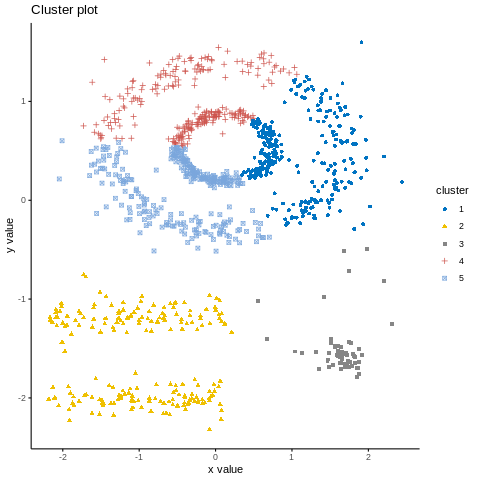

In [ ]:
%%R
set.seed(123)
km.res <- kmeans(df, 5, nstart = 25)
fviz_cluster(km.res, df, geom = "point",
ellipse= FALSE, show.clust.cent = FALSE,
palette = "jco", ggtheme = theme_classic())

In [ ]:
%%R
install.packages("fpc")

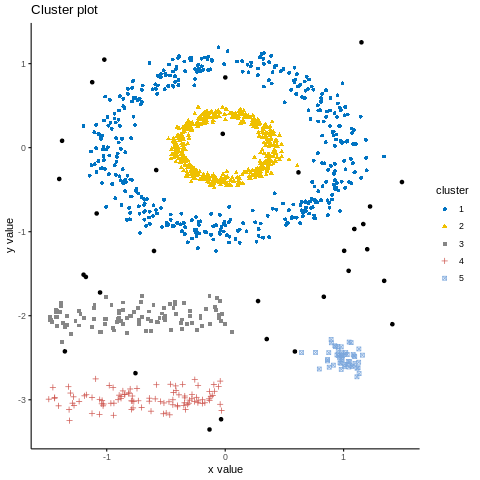

In [ ]:
%%R
library("fpc")
set.seed(123)
db <- fpc::dbscan(df, eps = 0.15, MinPts = 5)
fviz_cluster(db, data = df, stand = FALSE,
ellipse = FALSE, show.clust.cent = FALSE,
geom = "point",palette = "jco", ggtheme = theme_classic())

In [ ]:
%%R
print(db)
db$cluster[sample(1:1089, 20)]

dbscan Pts=1100 MinPts=5 eps=0.15
        0   1   2   3  4  5
border 31  24   1   5  7  1
seed    0 386 404  99 92 50
total  31 410 405 104 99 51
 [1] 2 2 1 2 1 4 1 2 2 2 0 4 1 1 3 1 2 1 4 2
